# Ejercicios 5 (Proyecto Final)

## Entrega Domingo 9 de Diciembre

#### 1. Pesos en la función de correlación (estimador de Landy-Salay)

   __a)__ Construye dos anillos concéntricos de radios distintos y ancho fijo, pero que el radio mayor del anillo más pequeño sea igual al radio menor del anillo más grande (ie ambos anillos deben de verse como un solo anillo del doble de ancho). La densidad de ambos anillos debe de ser igual. Grafica la distribución poniendo color rojo a los puntos del anillo pequeño y azul a los del grande.

Para que la densidad sea la misma en dos anillos del mismo grosor, la relación entre el número de puntos de cada anillo debe ser:

$$
n_{ch} = n_g\frac{r_{co}^2 - r_i^2}{r_e^2 - r_{co}^2}
$$

donde $n_{ch}$ es el número de puntos del anillo chico, $n_g$ del grande, $r_{co}$ el radio que tienen los anillos en común, $r_e$ el radio exterior del anillo grande y $r_i$ el radio interior del anillo chico.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import distros

In [2]:
n_g = 1000
r_i = 200.0
r_e = 300.0
r_co = (r_e + r_i) / 2.0
n_ch = int(n_g * (r_co**2 - r_i**2) / (r_e**2 - r_co**2))
box_size = 1000.0
bin_size = 5.0

In [3]:
x_peq, y_peq = distros.anillo_dist(n_ch, r_i, r_co, box_size / 2.0, box_size / 2.0)
x_gde, y_gde = distros.anillo_dist(n_g, r_co, r_e, box_size / 2.0, box_size / 2.0)

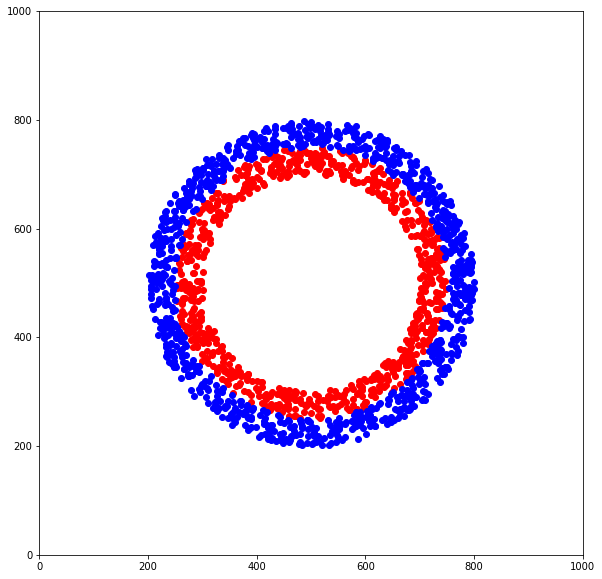

In [4]:
plt.figure(figsize = (10, 10))
plt.xlim([0.0, box_size])
plt.ylim([0.0, box_size])
plt.plot(x_peq, y_peq, 'ro')
plt.plot(x_gde, y_gde, 'bo')
plt.gca().set_aspect('equal')

   b) Mide la función de correlación asignando los siguientes pesos a cada punto: para puntos en el anillo pequeño (rojos) usa un peso de 2, mientras que para puntos en el anillo grande (azules) usa 1/2. Sobrepon en una gráfica la función de correlación sin pesos con la de pesos, y describe las diferencias en palabras.

In [6]:
bin_size = 5.0

In [19]:
dist_gde, hist_gde = distros.save_hist(x_gde, y_gde, box_size, bin_size)
frec_gde = hist_gde[0]
bins = hist_gde[1]
bins = bins[:-1]

In [9]:
dist_peq, hist_peq = distros.save_hist(x_peq, y_peq, box_size, bin_size)
frec_peq = hist_peq[0]

In [23]:
dist_cnj = dist_gde + dist_peq

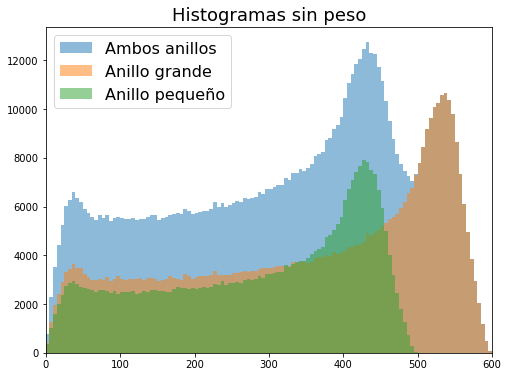

In [29]:
plt.figure(figsize = (8, 6))
plt.hist(dist_cnj, bins = bins, alpha = 0.5, label = "Ambos anillos");
plt.hist(dist_gde, bins = bins, alpha = 0.5, label = "Anillo grande");
plt.hist(dist_peq, bins = bins, alpha = 0.5, label = "Anillo pequeño");
plt.xlim([0.0, 2.0 * r_e])
plt.title('Histogramas sin peso', fontsize = 18);
plt.legend(fontsize = 16);

Esto de los histogramas por separado no era necesario, pero quería probar :)

El siguiente histograma es con pesos:

In [16]:
peso_gde = 0.5
peso_peq = 2.0

In [17]:
frec_conj = peso_gde * frec_gde + peso_peq * frec_peq

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(dist_cnj, bins = bins_cnj, alpha = 0.5);
plt.xlim([0.0, 2.0 * r_e])
plt.title('Histograma de distancias de los dos anillos en conjunto', fontsize = 18);

2.  De partículas a una malla. Usa la rutina [scipy.interpolate.griddata](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html). Sugerencia revisa el ejemplo de las notas de clase y el de la página anterior.

    a) Crea una malla de 100x100, e interpola los datos del anillo y de los multiples anillos a esta malla. Grafíca los datos de la malla como gráfica de densidad y pon los puntos originales encimados. Llamaremos a esta malla y sus valores, el campo. Utiliza los tres métodos de interpolación: más cercano, lineal y cúbico 1D.
    
    b) Calcula la función de correlación (estimador de Landy-Salay) para ambas muestras de datos usando los putos de la malla, y asignando un peso en cada punto dado por el valor del campo en ese punto. Grafica la función de correlación obtenida por este método de malla y compárala en la misma gráfica con la obtenida en base a los puntos originales. ¿Se parecen? ¿Dónde cambia? ¿Cómo cambia con los diferentes métodos de interpolación?
    
    c) Calcula la transformada de Fourier de este campo discreto (ie de la malla) para ambas muestras de datos, y obtén los espectros de potencia como el valor de expectación del producto de dos campos en este espacio de Fourier. Gráfica tanto el campo en el espacio de Fourier, como el espectro de potencias. ¿Cómo cambian los resultados del espectro de potencias con los diferentes métodos de interpolación?
    
    c) Utiliza la transformada de Fourier inversa para encontrar la función de correlación a partir de los espectros de potencia anteriores, y compáralos con los que encontraste en el inciso b).